In [0]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
btc = pd.read_csv("/content/drive/My Drive/Neural Networks/Data/BTC_USD_2013-10-01_2020-01-12-CoinDesk.csv",nrows=1102)
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,01-01-2017,964.32500,952.45500,968.48500,949.08625
1,BTC,02-01-2017,1009.97375,964.32500,1011.52500,963.53000
2,BTC,03-01-2017,1028.33375,1009.97375,1034.10500,998.62125
3,BTC,04-01-2017,1047.09999,1028.33375,1048.12375,1013.37750
4,BTC,05-01-2017,1140.38500,1047.09999,1141.99750,1047.06375


In [0]:
btc_price = btc[["Date","Closing Price (USD)"]]
btc_price.head()

,Date,Closing Price (USD)
0,01-01-2017,964.32500
1,02-01-2017,1009.97375
2,03-01-2017,1028.33375
3,04-01-2017,1047.09999
4,05-01-2017,1140.38500


In [0]:
btc_price.tail()

,Date,Closing Price (USD)
1097,14-01-2020,8116.961008
1098,15-01-2020,8735.142439
1099,16-01-2020,8843.675732
1100,17-01-2020,8711.637578
1101,18-01-2020,8925.299028


In [0]:
btc_price["Date"] = pd.to_datetime(btc_price["Date"],format='%d-%m-%Y',infer_datetime_format=True)
btc_price = btc_price.set_index("Date")
btc_price.columns=["Price"]

In [0]:
btc_price.isna().sum()

Price    0
dtype: int64

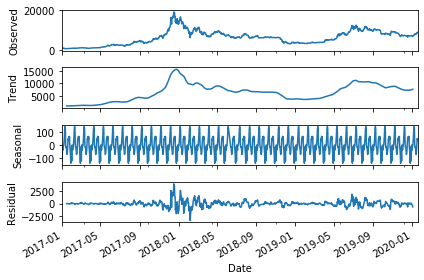

In [0]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(btc_price,model ="additive",freq=30)
fig = decomposition.plot()
plt.show()

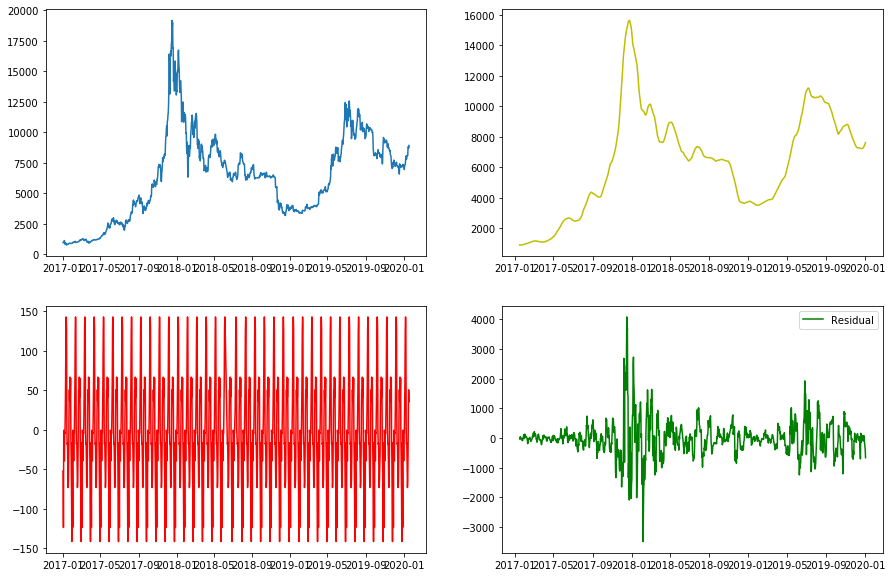

In [0]:
plt.figure(figsize=(15,10))
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(btc_price,label="Original")
plt.subplot(222)
plt.plot(trend,label="Trend",color='y')
plt.subplot(223)
plt.plot(seasonality,label="Seasonality",color='r')
plt.subplot(224)
plt.plot(residual,label="Residual",color='g')

plt.legend()
plt.show()

In [0]:
train = btc_price[0:993]
test = btc_price[993:]

In [0]:
train.isna().sum()

Price    0
dtype: int64

In [0]:
train.head()

,Price
Date,
2017-01-01,964.32500
2017-01-02,1009.97375
2017-01-03,1028.33375
2017-01-04,1047.09999
2017-01-05,1140.38500


In [0]:
test.head()

,Price
Date,
2019-10-01,8241.341470
2019-10-02,8333.689190
2019-10-03,8273.464018
2019-10-04,8203.843833
2019-10-05,8163.902638


In [0]:
#train = train.resample('D').mean() 

In [0]:
train.isna().sum()

Price    0
dtype: int64

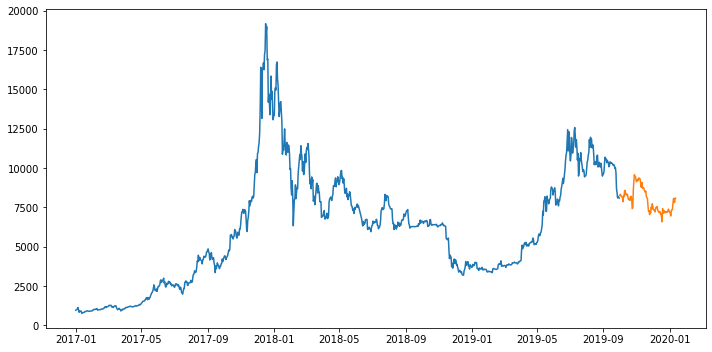

In [0]:
plt.figure(figsize=(10,5))
plt.plot(train.Price)
plt.plot(test.Price)
plt.tight_layout()

###### NAIVE APPROACH
   - In this forecasting technique, the value of the new data point is predicted to be equal to the previous data point.  
   - The result would be a flat line, since all new values take the previous values.

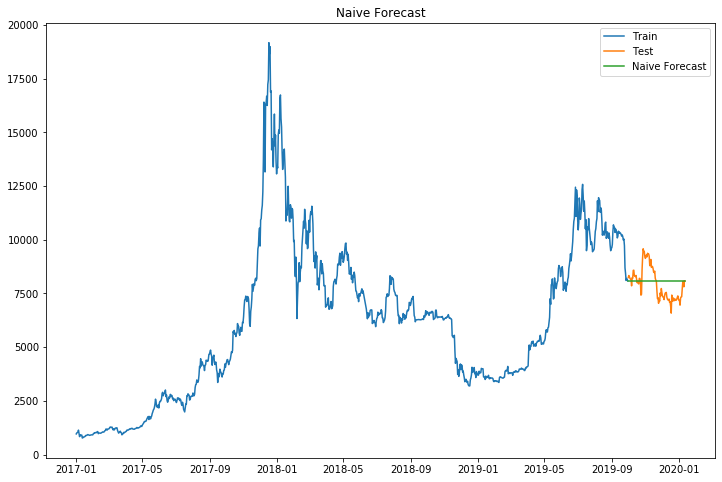

In [0]:
naive= np.asarray(train.Price)
y_pred = test.copy()
y_pred['naive'] = naive[len(naive)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index,test['Price'], label='Test')
plt.plot(y_pred.index,y_pred['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [0]:
y_pred.head()

,Price,naive
Date,,
2019-10-01,8241.341470,8085.71329
2019-10-02,8333.689190,8085.71329
2019-10-03,8273.464018,8085.71329
2019-10-04,8203.843833,8085.71329
2019-10-05,8163.902638,8085.71329


In [0]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test.Price, y_pred.naive))
print(rmse)

753.2239038881894


###### SIMPLE AVERAGE
- The next value is taken as the average of all the previous values.
- The predictions here are better than the ‘Naive Approach’ as it doesn’t result in a flat line but here, all the past values are taken into consideration which might not always be useful. 

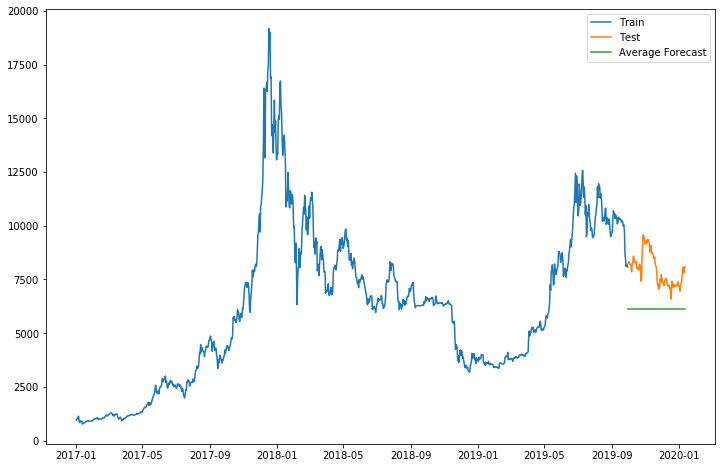

In [0]:
y_pred_avg = test.copy()
y_pred_avg['avg_forecast'] = train['Price'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_pred_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [0]:
rmse = np.sqrt(mean_squared_error(test.Price, y_pred_avg.avg_forecast))
print(rmse)

1973.644889392358


###### MOVING AVERAGE

<Figure size 720x360 with 0 Axes>

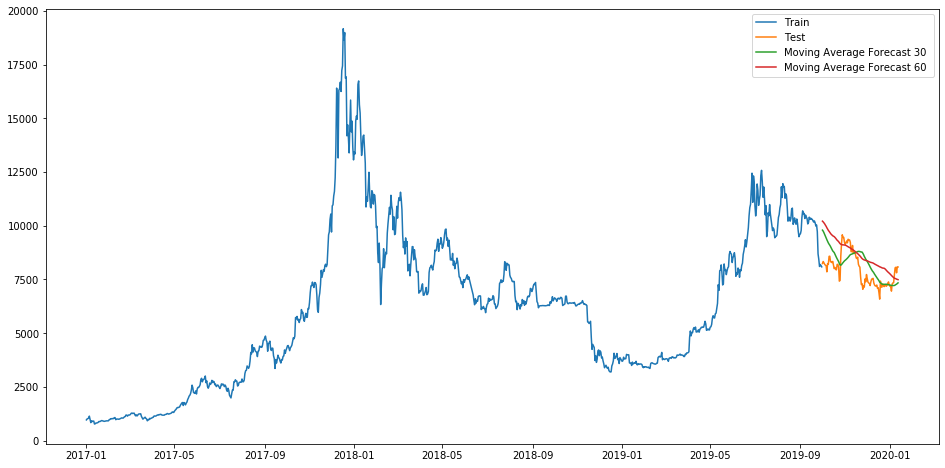

In [0]:
plt.figure(figsize=(10,5))
#rolling_mean=btc_price
rolling_mean= btc_price["Price"].rolling(30).mean()
rolling_mean1= btc_price["Price"].rolling(60).mean()
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(rolling_mean[993:], label='Moving Average Forecast 30 ')
plt.plot(rolling_mean1[993:], label='Moving Average Forecast 60')
plt.legend(loc='best')

In [0]:
rmse = np.sqrt(mean_squared_error(test.Price, rolling_mean[993:]))
print(rmse)

757.853996303872


Exponentially Weighted Moving Average
- Instead of giving equal importance to all the previous values, weighted moving average reduces the weights exponentially.
- For predicting the price of bitcoin at  time t, price at t-1 is given a higher importance than t-2,t-3,....

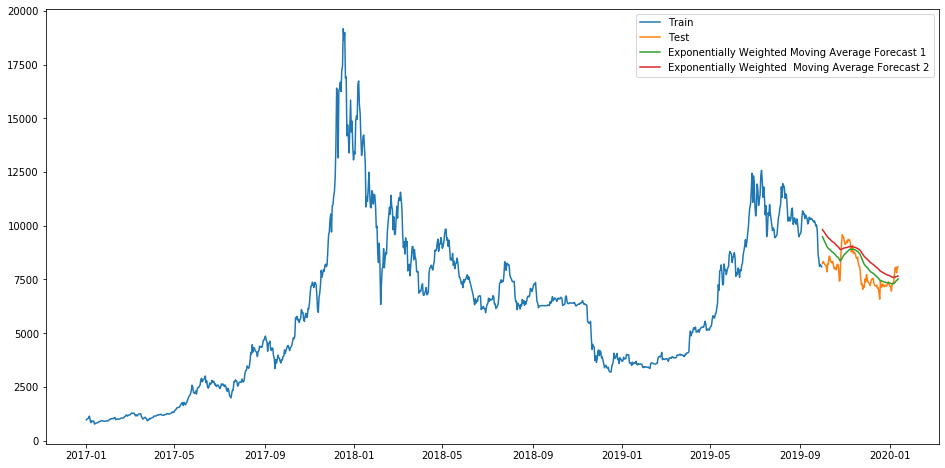

In [0]:
exp_30 = btc_price["Price"].ewm(span=30, adjust=False).mean()
exp_60 =btc_price["Price"].ewm(span=60, adjust=False).mean()
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(exp_30[993:], label='Exponentially Weighted Moving Average Forecast 1')
plt.plot(exp_60[993:], label='Exponentially Weighted  Moving Average Forecast 2')
plt.legend(loc='best')

In [0]:
rmse = np.sqrt(mean_squared_error(test.Price, exp_30[993:]))
print(rmse)

604.7521997568145


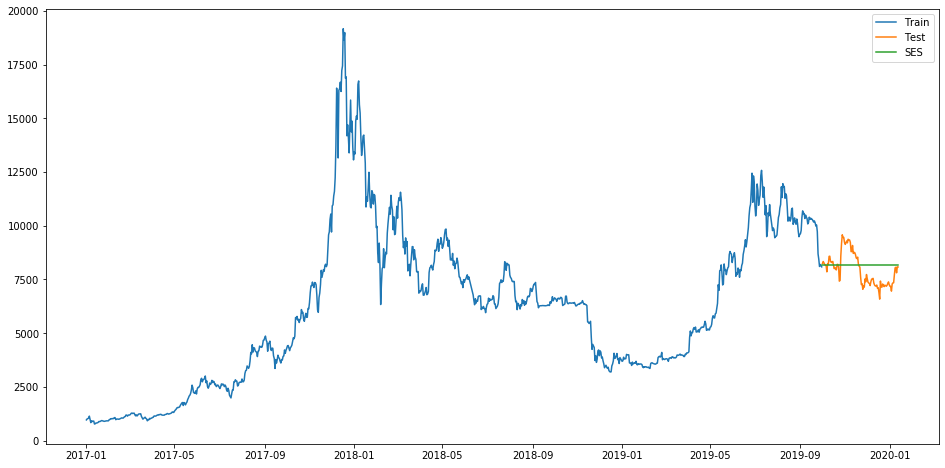

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit2 = SimpleExpSmoothing(np.asarray(train['Price'])).fit(smoothing_level=0.5,optimized=False)
y_pred_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_pred_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [0]:
rmse = np.sqrt(mean_squared_error(test.Price, y_pred_avg.SES))
print(rmse)

RMSE = 43.3576252252

771.5381382437533


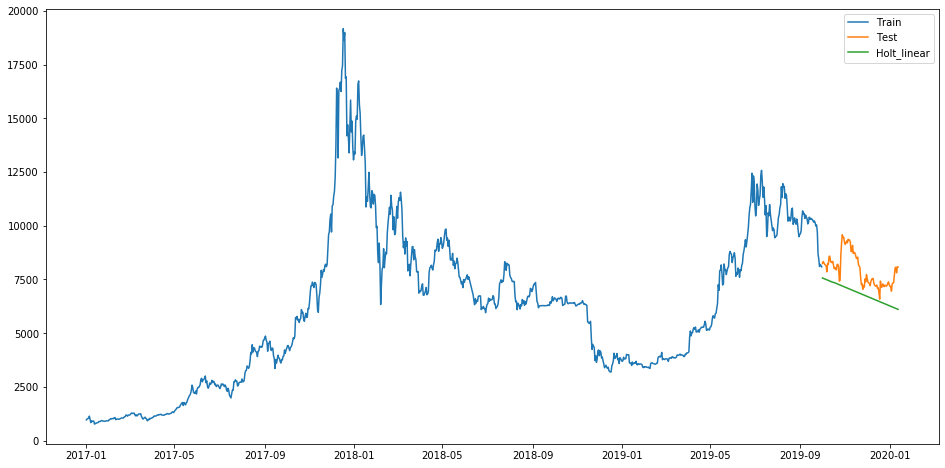

In [0]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.93)
y_pred_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_pred_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

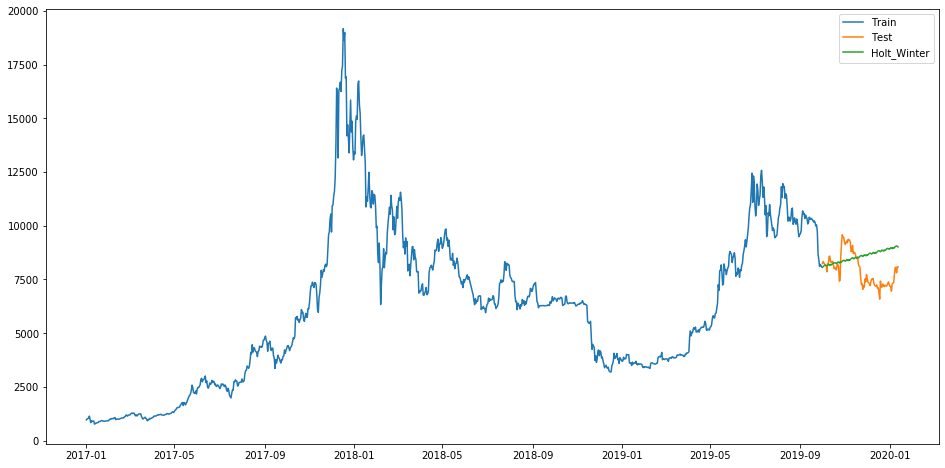

In [0]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12,trend='additive', seasonal='additive',).fit()
y_pred_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_pred_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [0]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 3.4MB/s 


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=14655.559, BIC=14694.757, Fit time=5.559 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14651.825, BIC=14661.624, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=14650.916, BIC=14670.515, Fit time=0.392 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=14650.948, BIC=14670.547, Fit time=0.459 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14650.163, BIC=14655.063, Fit time=0.021 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=14653.075, BIC=14667.774, Fit time=0.298 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=14652.930, BIC=14667.629, Fit time=0.254 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=14653.731, BIC=14673.330, Fit time=1.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=14649.450, BIC=14664.149, Fit time=0.063 seconds
Fit ARIMA:

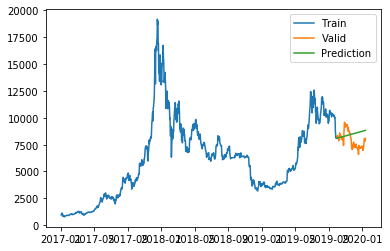

Optimized value for order: (1, 1, 0)
Optimized value for order: (0, 0, 0, 12)


In [0]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,stepwise=True,
                    m=12,n_fits=30)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Price'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()
print("Optimized value for order: {}".format(model.order))
print("Optimized value for order: {}".format(model.seasonal_order))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.


In [0]:
train.shape[0]

993

In [0]:
dataset = btc_price.reset_index()

In [0]:
dataset = dataset[["Price"]].values
dataset = dataset.astype('float32')

In [0]:
dataset

array([[ 964.325  ],
       [1009.97375],
       [1028.3337 ],
       ...,
       [8843.676  ],
       [8711.638  ],
       [8925.299  ]], dtype=float32)

In [0]:
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [0]:
dataset

array([[-1.5349913 ],
       [-1.5218642 ],
       [-1.5165846 ],
       ...,
       [ 0.7308339 ],
       [ 0.69286436],
       [ 0.75430584]], dtype=float32)

In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

738 364


In [0]:
train.shape

(738, 1)

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
look_back = 30
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [0]:
trainX.shape

(707, 30)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
trainX.shape

(707, 1, 30)

In [0]:
trainY.shape

(707,)

In [0]:
trainY

array([-1.54734898e+00, -1.53247786e+00, -1.52967060e+00, -1.51895511e+00,
       -1.52150726e+00, -1.51627767e+00, -1.51917887e+00, -1.51627553e+00,
       -1.50526166e+00, -1.50396883e+00, -1.53193331e+00, -1.52552974e+00,
       -1.52337694e+00, -1.52333665e+00, -1.52629101e+00, -1.52370000e+00,
       -1.51943791e+00, -1.51355588e+00, -1.50796306e+00, -1.50953639e+00,
       -1.51131392e+00, -1.50184727e+00, -1.49227679e+00, -1.48950136e+00,
       -1.46908832e+00, -1.47227216e+00, -1.48451698e+00, -1.47027731e+00,
       -1.47011030e+00, -1.46905661e+00, -1.46116614e+00, -1.44715416e+00,
       -1.44266832e+00, -1.44977343e+00, -1.44615614e+00, -1.44412649e+00,
       -1.46539128e+00, -1.48071778e+00, -1.46705925e+00, -1.48228061e+00,
       -1.47114444e+00, -1.45699561e+00, -1.45490992e+00, -1.45402253e+00,
       -1.45351088e+00, -1.48847568e+00, -1.50688314e+00, -1.52466166e+00,
       -1.51431513e+00, -1.50590241e+00, -1.49846828e+00, -1.51435161e+00,
       -1.52075136e+00, -

In [0]:

trainX[0]

array([[-1.5349913, -1.5218642, -1.5165846, -1.5111881, -1.4843626,
        -1.5287759, -1.571365 , -1.5467243, -1.5565547, -1.551986 ,
        -1.5504389, -1.590107 , -1.5865893, -1.576296 , -1.5761501,
        -1.5734056, -1.5682751, -1.55628  , -1.5569217, -1.554592 ,
        -1.5475683, -1.543488 , -1.5476326, -1.549977 , -1.5539058,
        -1.5531869, -1.5497955, -1.5477965, -1.5474992, -1.5486257]],
      dtype=float32)

In [0]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=40, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 10s - loss: 0.5354
Epoch 2/10
 - 0s - loss: 0.3686
Epoch 3/10
 - 0s - loss: 0.2874
Epoch 4/10
 - 0s - loss: 0.2426
Epoch 5/10
 - 0s - loss: 0.2052
Epoch 6/10
 - 0s - loss: 0.1674
Epoch 7/10
 - 0s - loss: 0.1387
Epoch 8/10
 - 0s - loss: 0.1172
Epoch 9/10
 - 0s - loss: 0.1022
Epoch 10/10
 - 0s - loss: 0.0913


In [0]:
trainY[0]

-1.5414026

In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 565
Trainable params: 565
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
testX.shape

(331, 1, 30)

In [0]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [0]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 579.58 RMSE
Test Score: 504.14 RMSE


In [0]:


# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

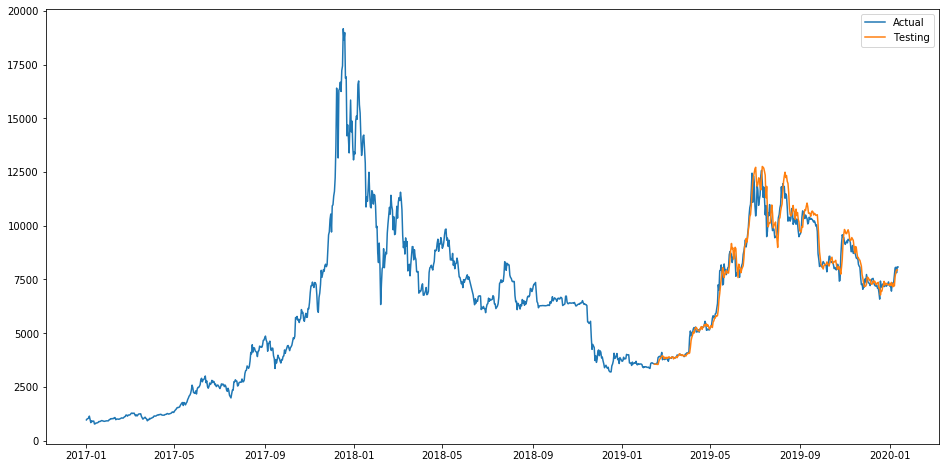

In [0]:
plt.figure(figsize=(16,8))
plt.plot(btc_price['Price'], label='Actual')
#plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=btc_price.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=btc_price.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [0]:
testX_final = [6584.028843,
7424.0154,
7147.568324,
7139.933371,
7286.335081,
7236.986205,
7166.172379,
7235.62665,
7212.809395,
7183.706536,
7227.293712,
7311.560644,
7385.464848,
7251.276794,
7179.957819,
7174.744012,
6955.48758,
7291.219505,
7337.63667,
7347.433264,
7713.860754,
8039.603701,
8067.606369,
7808.701364,
8087.452885,
8078.993532,
8149.313717,
8116.961008,
8735.142439,
8843.675732
]
testX_final = scaler.fit_transform(pd.DataFrame(testX_final))
testX_final =np.reshape(testX_final, (1, 1, 30))
final_Predict = model.predict(testX_final)
final_Predict = scaler.inverse_transform(final_Predict)

In [0]:
final_Predict

array([[8636.326]], dtype=float32)